In [3]:
from segmentation import find_best_borders_connect, find_best_borders_projection, find_best_borders_gas, show_borders,show_gas,find_local_min
from PIL import Image
from ha_SignCompare import ha_SignCompare
import glob
import numpy as np
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

path = r'./data_1/艾兴义_5723.jpg'
name = path.split('/')[-1].split('.')[0].split('_')[0]
%timeit ha_SignCompare(path, name)

352 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
from ha_SignCompare import ha_SignCompare
import glob
%matplotlib inline
count, pos_count = 0, 0
dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*安国英*.jpg'))
# path = r'./data_1/艾兴义_5723.jpg'

for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    code, message, char_count, char_list = ha_SignCompare(path, name)
    temp_count = 0
    for i, n in enumerate(name):
        count += 1
        if n in char_list[i]:
            temp_count += 1
    pos_count += temp_count
    # if temp_count != len(name):
    print(name, char_list)
print(count, pos_count)

安国英 [['穷', '客', '安', '宕', '宫', '官', '穸', '宝', '宅', '害', '空', '宠', '穹', '守', '究', '字', '宾', '室', '容', '帘', '宓', '宄', '宇', '宰', '它', '窖', '宙', '寄', '寓', '妄'], ['图', '固', '囝', '目', '围', '圆', '园', '凰', '国', '回', '圄', '同', '圈', '囹', '圉', '囡', '冒', '郭', '团', '周', '厚', '囵', '困', '夙', '囤', '四', '因', '闯', '圊', '自'], ['晕', '虽', '茧', '黄', '垦', '量', '邑', '萆', '费', '芭', '呈', '强', '茔', '蒸', '黾', '草', '苣', '昌', '荬', '芑', '星', '晏', '罢', '墓', '罱', '罴', '芎', '蚤', '英', '翼']]
安国英 [['宠', '割', '窃', '寓', '容', '钫', '蜜', '窥', '豁', '宾', '窭', '铉', '窈', '窍', '铵', '妄', '穷', '钞', '庞', '窖', '禽', '宕', '窘', '铋', '安', '铱', '害', '宓', '钕', '寒'], ['国', '园', '囝', '闫', '囤', '闰', '闺', '围', '罔', '困', '图', '回', '阖', '圄', '圆', '阅', '戽', '阒', '目', '闼', '郭', '霉', '囡', '圈', '阂', '因', '同', '圜', '团', '囵'], ['葵', '莫', '墓', '费', '蓉', '萆', '萸', '燕', '英', '奠', '垦', '荬', '荩', '葜', '蔡', '菟', '蔓', '曼', '荜', '疑', '夤', '茧', '幕', '摹', '蒸', '荧', '萤', '箜', '莹', '獒']]
6 6


1 0.09055519104003906
1 0.0217130184173584


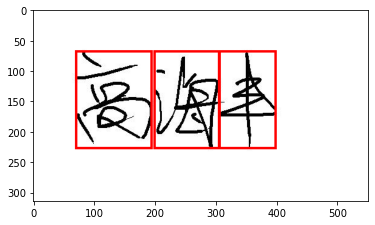

3 0.676335334777832


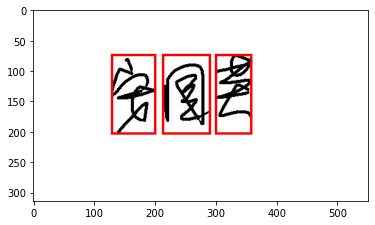

2 0.545529842376709
2 0.023314237594604492
2 0.011793851852416992
2 0.01378631591796875
2 0.010667800903320312
2 0.017685413360595703
2 0.008775949478149414
2 0.003969907760620117
2 0.002781391143798828
2 0.03467059135437012
2 0.02108311653137207
2 0.01647329330444336


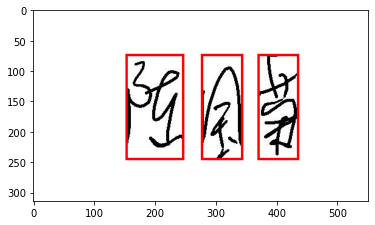

3 0.5589649677276611


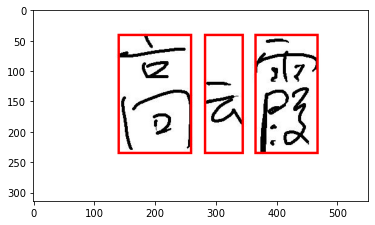

3 0.6160573959350586
3 0.002701997756958008
3 0.0030128955841064453
3 0.0052525997161865234
3 0.007979869842529297
3 0.006677389144897461
3 0.012202262878417969


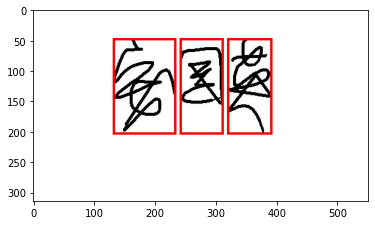

2 0.5568945407867432
2 0.012691497802734375
2 0.009349346160888672
2 0.012530803680419922


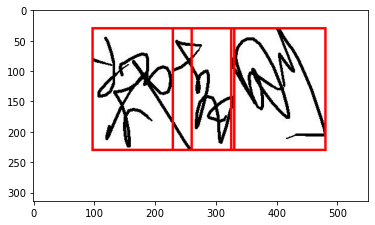

1 0.5636739730834961


In [8]:
from segmentation import find_best_borders_connect, find_best_borders_projection, find_best_borders_gas, show_borders, show_gas, find_local_min, find_connect
from PIL import Image
from ha_SignCompare import ha_SignCompare
import glob
import numpy as np
import time
from scipy.ndimage import gaussian_filter1d
from prediction import image_prediction
%matplotlib inline
# 郑志刚_1592 高海丰_1381
dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*.jpg'))
# jpg_path_list = ['./data_1/高海丰_1381.jpg', './data_1/郑志刚_1592.jpg']
# path = r'./data_1/艾兴义_5723.jpg'
for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    img = Image.open(path).convert('RGB')
    direction = 1
    s_t = time.time()
    areas = find_connect(img, direction = direction, overlap = 0.85)
    if len(areas) == 3:
        borders = find_best_borders_connect(img, name, direction = direction, net_type = 'S', net_num = 297)
    # print(len(areas))
        show_borders(img, borders)
        count = 0
        for i, border in enumerate(borders):
            pred_char, conf, toplist, label_confs = image_prediction(img.crop(border), topk = 30, labels = list(name))
            if name[i] in toplist:
                count += 1
    e_t = time.time()
    print(count, str(e_t - s_t))
    #     print(toplist)
    #     print(label_confs)
    # borders = find_best_borders_gas(img, name, direction = direction, net_type = 'S', gas_std = 8, net_num = 297)
    # show_borders(img, borders)
    # borders = find_best_borders_gas(img, name, direction = direction, net_type = 'G', net_num = 825)
    # show_borders(img, borders)
    # start_time = time.time()
    # code, message, char_count, char_list = ha_SignCompare(path, name)
    # end_time = time.time()
    # print(str(end_time - start_time))
    # print(char_list)
    # %timeit ha_SignCompare(path, name)

    # limg = img.convert('L').point(lambda p: 0 if p > 200 else 1, '1')
    # img_data = np.array(limg, dtype=np.int32)
    # verdire_sum = img_data.sum(axis=1-direction)
    # gas8 = gaussian_filter1d(verdire_sum, 7)
    # local_min = find_local_min(gas8)
    # show_gas(img, direction = direction, gas_std = 7)
    # print(local_min)


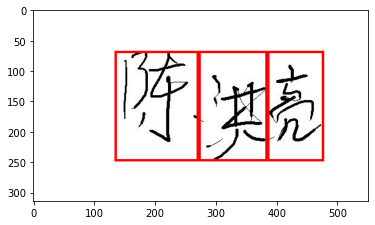

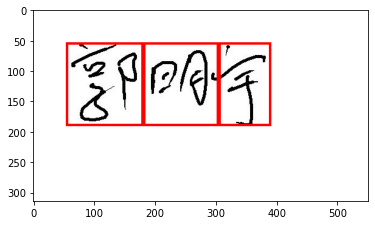

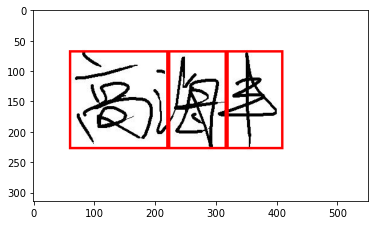

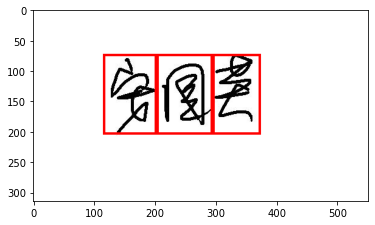

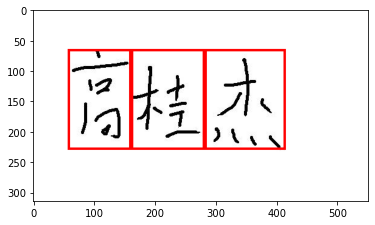

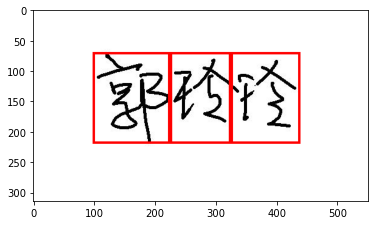

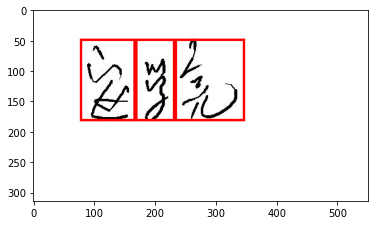

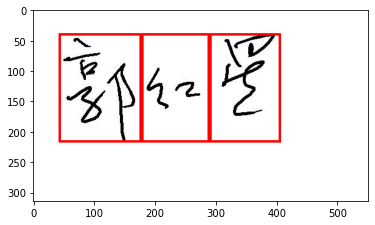

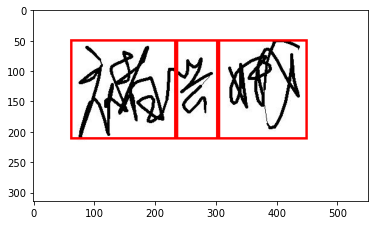

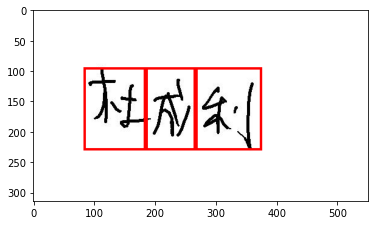

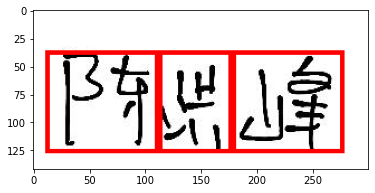

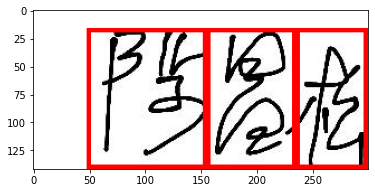

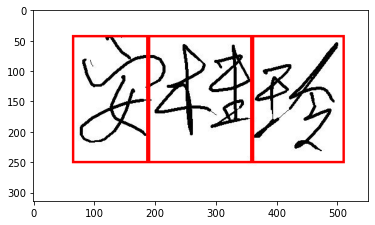

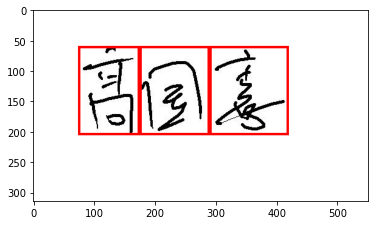

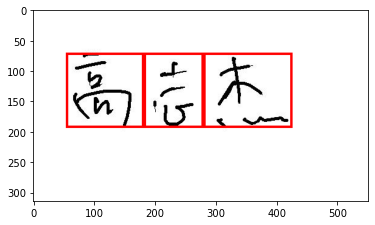

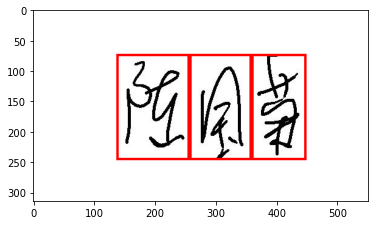

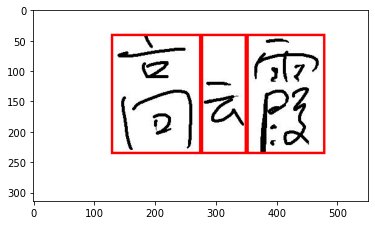

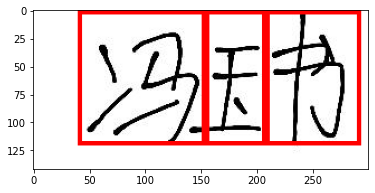

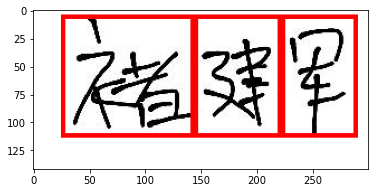

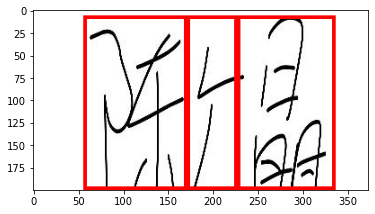

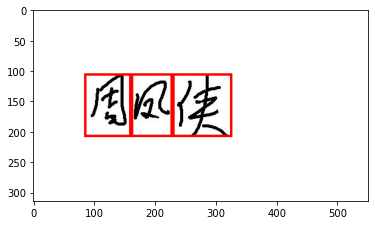

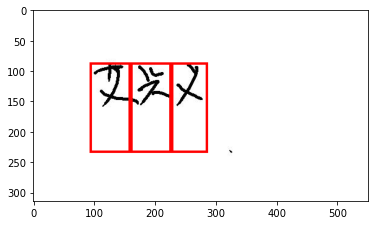

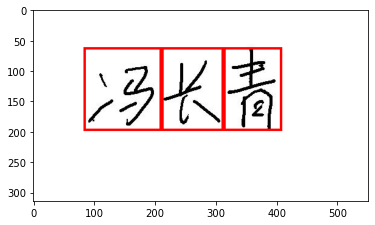

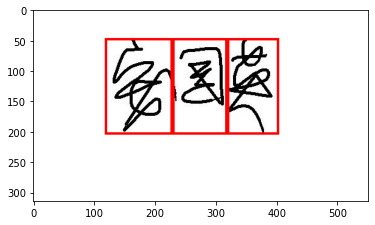

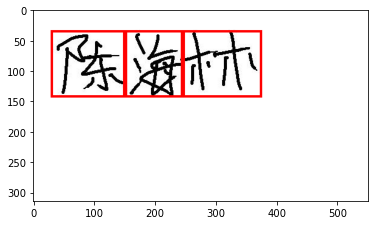

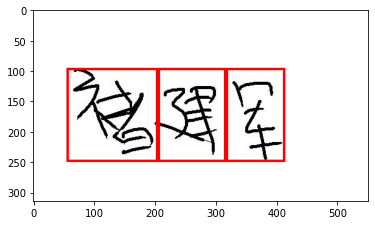

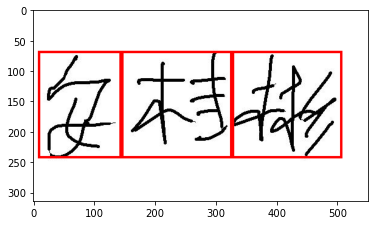

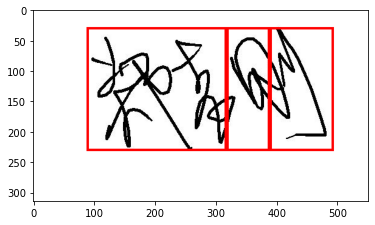

In [4]:
from segmentation import find_best_borders_connect, find_best_borders_projection, find_best_borders_gas, show_borders,show_gas,find_local_min
from PIL import Image
from ha_SignCompare import ha_SignCompare
import glob
import numpy as np
import time
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*安国英*.jpg'))
# path = r'./data_1/艾兴义_5723.jpg'
for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    img = Image.open(path).convert('RGB')
    direction = 1
    borders = find_best_borders_gas(img, name, direction = direction)
    show_borders(img, borders)
    # borders = find_best_borders_gas(img, name, direction = direction, net_type = 'G', net_num = 825)
    # show_borders(img, borders)


In [2]:
from ha_SignCompare import ha_SignCompare
import glob
import time

dir_path = r'./data_1/'
jpg_path_list = glob.glob(os.path.join(dir_path, '*.jpg'))
for path in jpg_path_list:
    name = path.split('/')[-1].split('.')[0].split('_')[0]
    start_time = time.time()
    code, message, char_count, char_list = ha_SignCompare(path, name)
    end_time = time.time()
    print(str(end_time - start_time))

1.1408209800720215
0.9147655963897705
1.0825202465057373
0.7451493740081787
1.082850694656372
1.194319725036621
0.7459824085235596
0.8585629463195801
1.2513611316680908
0.9137935638427734
0.7986454963684082
0.7434737682342529
1.4211509227752686
1.1389172077178955
0.7459728717803955
1.137237548828125
1.2518858909606934
0.798839807510376
0.7429368495941162
0.7443950176239014
0.35373997688293457
0.3533189296722412
0.6965124607086182
0.8822159767150879
1.1961185932159424
0.7483463287353516
1.255600929260254
1.7057111263275146


In [9]:
from prediction import image_prediction
from PIL import Image
%matplotlib inline

path = r'./test00001.png'
img = Image.open(path)
%timeit image_prediction(img, net_num = 825, topk = 30, labels = None, net_type = 'G')
# %timeit image_prediction(img, net_num = 297, topk = 30, labels = None, net_type = 'S')
%timeit image_prediction(img, net_num = 297, topk = 30, labels = None, net_type = 'S')

117 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
56.2 ms ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
